In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# root_dir of where the data is
root_dir = '../../data/'

# Location of images.
image_dir = root_dir + 'images/'

# Location of where to read features.
feature_dir = root_dir + 'features/'

# The .csv file containing the image names and classes.
image_file = root_dir + 'image_names_classes.csv'

In [12]:
# Number of images.
n_images = 218

# Read image names and classes .csv file.
image_names_classes = pd.read_csv(image_file, header=None )

In [13]:
# Read the features from the .csv file.
feature_filename = feature_dir + 'Gabor_2_3.txt'
features = np.genfromtxt(feature_filename, delimiter=',')

# Determine feature dimension.
fdim = np.shape(features)[1]

In [14]:
# Use first image as query.
query_image = 0

# Compute Euclidean distance between query feature vector and each image's feature vector.
distances = np.zeros(n_images)

for i in range(n_images):
    distances[i] = 0
    for j in range(fdim):
        distances[i] = distances[i] + ((features[query_image][j] - features[i][j])**2)
    distances[i] = distances[i] ** 0.5


In [15]:
# Get the indices of the sorted distances.
sorted_index = np.argsort(distances)

In [16]:
# Retrieve top k images.
k = 5

# Print the distances of the top k images.
print(distances[sorted_index[0:k]])

[0.         0.00193697 0.0020595  0.0021349  0.00308555]


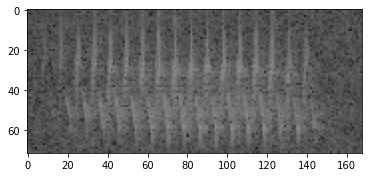

In [17]:
# Show the query image.
filename = image_dir + image_names_classes[0][query_image]
im = plt.imread(filename)
plt.imshow(im,cmap='gray')

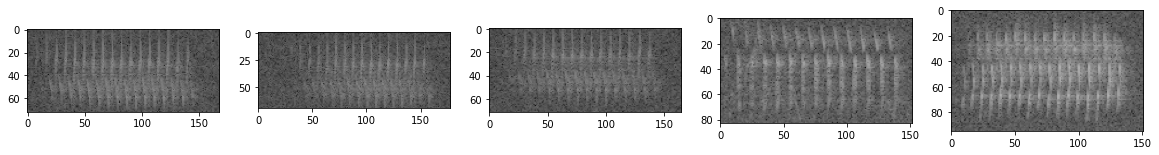

In [18]:
# Show top k images.
fig, axs = plt.subplots(1, k, figsize=(20,20))

for i in range(k):
    filename = image_dir + image_names_classes[0][sorted_index[i]]
    im = plt.imread(filename)
    axs[i].imshow(im,cmap='gray')
